In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Check openai version, which should > 1.1: pip show openai
import os
import openai

# Construct the game

## Levels

In [2]:
# Parsing level from string format to a 2D numpy array
def parse_level(level_str):
    rows = level_str.strip().split('\n')
    return np.array([list(row.split(',')) for row in rows])

wall_test_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,A,-,-,-,-,-,-,-,-,G,-
x,x,-,x,x,x,x,x,x,x,x,x
'''
wall_test = parse_level(wall_test_str)

jump_over_test_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,B,x,-,-,-,-,-,-,A,G,-
x,x,x,x,x,x,x,x,x,x,x,x
'''
jump_over_test = parse_level(jump_over_test_str)

level_0_str = '''
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
-,-,-,-,-,x,-,-,-,-,-,-
x,-,-,-,-,x,-,-,-,-,-,x
x,-,-,-,-,x,-,-,-,-,-,x
x,A,B,k,-,&,-,-,-,-,G,x
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_0 = parse_level(level_0_str)

level_1_str = '''
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,-,-,-,x,-,-,-
-,-,-,-,-,k,-,-,x,-,-,-
-,-,-,-,-,x,-,-,x,-,-,-
-,A,B,-,-,-,-,-,&,-,G,-
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_1 = parse_level(level_1_str)

level_2_str = '''
-,-,v,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
k,-,z,-,A,-,B,n,-,-,&,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_2 = parse_level(level_2_str)

level_3_str = '''
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
-,-,z,-,-,-,-,-,-,-,x,-
k,-,^,-,A,-,B,n,-,-,&,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_3 = parse_level(level_3_str)

level_4_str = '''
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
-,-,-,-,z,-,-,-,-,-,x,-
k,-,-,-,z,-,-,-,-,-,x,-
x,-,-,-,z,-,-,-,-,-,x,-
-,-,n,-,^,A,B,-,n,-,&,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_4 = parse_level(level_4_str)

level_5_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,x,-
A,B,-,k,-,k,-,k,-,&,x,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_5 = parse_level(level_5_str)

level_6_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,v,-,-,x,-,-,v,-,-,-
A,B,z,-,n,x,-,-,z,-,n,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_6 = parse_level(level_6_str)

level_7_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,x,-,-,-,-,-,-,-,-,-,-
-,x,x,-,-,-,-,-,-,-,-,-
-,x,x,x,-,-,-,-,-,-,-,-
-,v,v,v,x,-,-,-,-,-,-,-
k,z,z,z,-,-,A,B,-,n,-,G
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_7 = parse_level(level_7_str)

level_8_str = '''
-,-,v,-,-,-,-,-,v,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,x,-
-,-,z,-,-,-,-,-,z,-,&,-
G,k,z,n,A,-,-,B,z,n,x,G
x,x,x,x,x,-,-,x,x,x,x,x
'''

level_8 = parse_level(level_8_str)

level_9_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,G
x,x,x,x,x,x,x,x,x,-,-,x
-,-,-,-,v,-,-,-,-,-,&,x
A,-,n,-,z,-,n,-,-,x,-,-
x,x,x,x,x,x,x,x,x,x,x,x
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,G
x,x,x,x,x,x,x,x,-,-,-,x
-,v,-,-,-,v,-,-,-,-,x,-
B,z,-,n,-,z,-,k,-,x,x,-
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_9 = parse_level(level_9_str)

level_10_str = '''
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,-,-,-,-,-,-,-,-,-
-,-,-,x,-,-,-,-,-,-,-,-
-,-,x,x,-,x,x,-,-,-,-,-
k,x,x,x,-,x,x,x,-,-,-,-
x,x,x,x,&,x,x,x,x,-,-,-
x,x,x,x,G,x,x,x,x,x,A,B
x,x,x,x,x,x,x,x,x,x,x,x
'''

level_10 = parse_level(level_10_str)

## Render

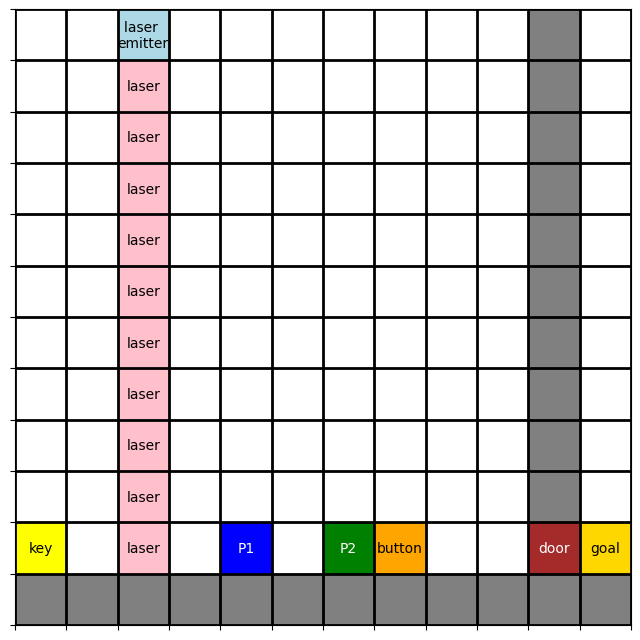

In [3]:
import matplotlib.colors as mcolors

def display_level_with_labels(level_data, idx=0):
    # Color mapping for each tile
    color_map = {
        '-': 'white',
        'x': 'gray',
        'A': 'blue',
        'B': 'green',
        'C': 'red',
        'D': 'purple',
        'k': 'yellow',
        'n': 'orange',
        'u': 'cyan',
        '&': 'brown',
        'z': 'pink',
        'v': 'lightblue',
        '^': 'lightgreen',
        'G': 'gold'
    }

    # Label mapping for each tile
    label_map = {
        '-': '',
        'x': '',
        'A': 'P1',
        'B': 'P2',
        'C': 'P3',
        'D': 'P4',
        'k': 'key',
        'n': 'button',
        'u': 'button',
        '&': 'door',
        'z': 'laser',
        'v': 'laser \nemitter',
        '^': 'laser \nemitter',
        'G': 'goal'
    }

    # Convert tile symbols to RGB values using color map
    rows, cols = level_data.shape
    color_data = np.zeros((rows, cols, 4))
    for i in range(rows):
        for j in range(cols):
            color_data[i, j] = mcolors.to_rgba(color_map[level_data[i, j]])

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(color_data)

    # Add labels
    for i in range(rows):
        for j in range(cols):
            label = label_map[level_data[i, j]]
            ax.text(j, i, label, ha='center', va='center', color='black' if level_data[i, j] in ['-', 'k', 'G', 'u', 'n', 'z', 'v', '^'] else 'white')

    ax.set_xticks(np.arange(-0.5, 12, 1))
    ax.set_yticks(np.arange(-0.5, 12, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(which='both', color='black', linewidth=2)
    ax.set_aspect('equal')

    plt.show()

display_level_with_labels(level_2)

In [4]:
def print_to_string(level):
    level_string = ''
    for row in level:
      level_string = level_string + ','.join(row) + '\n'
    return level_string

## Engine

In [5]:
def move_player(level_data, x, y, dx, dy):
    '''Move a player in the level_data by dx and dy if possible.'''
    player_symbol = level_data[x, y]
    new_x, new_y = x + dx, y + dy
    target_cell = level_data[new_x, new_y]

    if target_cell not in ['x', '&', 'v', '^', 'A', 'B', 'C', 'D', 'n', 'u']:  # fail if not solid

        if target_cell == 'k':  # key logic
            level_data[level_data == '&'] = '-'  # Open all doors
            level_data[new_x, new_y] = player_symbol
            level_data[x, y] = '-'

        elif target_cell == 'G':  # goal logic
            level_data[x, y] = '-'

        else:
            level_data[x, y], level_data[new_x, new_y] = '-', player_symbol

def jump_over(level_data, x, y, direction):
    offset = -1 if direction == 'left' else 1

    # Check if the jump is within bounds
    if not (0 <= x - 1 < 12) or not (0 <= y + 2*offset < 12):
        return (0, 0)

    # Check for laser at one up and one to the direction
    if level_data[x-1, y+offset] == 'z':
        return (None, None)

    # Check if one up and one to the direction is blocked by a non-laser
    if level_data[x-1, y+offset] in ['x', 'v', '^', '&', 'A', 'B', 'C', 'D']:
        return (0, 0)

    # Check if two to the direction and one up is blocked
    if level_data[x-1, y+2*offset] in ['x', 'v', '^', '&', 'A', 'B', 'C', 'D', 'z']:
        return (-1, offset)

    # If both checks pass, move two to the direction
    return (0, 2*offset)

def handle_player_action(level_data, player, action):
    x, y = np.where(level_data == player)
    if len(x) == 0:
        return level_data
    x, y = x[0], y[0]

    moves = {
        'move left': (0, -1),
        'move right': (0, 1),
        'jump on left': (-1, -1),
        'jump on right': (-1, 1),
        'jump over left': jump_over(level_data, x, y, 'left'),
        'jump over right': jump_over(level_data, x, y, 'right')
    }

    dx, dy = moves.get(action, (0, 0))
    if dx is None:
      level_data[x, y] = '-'
      return level_data

    if 0 <= x + dx < 12 and 0 <= y + dy < 12:  # Ensure within bounds
        move_player(level_data, x, y, dx, dy)

    return level_data

def apply_gravity(updated_data):
    players = ['A', 'B', 'C', 'D']

    for _ in range(11):
        for i in range(11, 0, -1):
            for j in range(12):
                cell = updated_data[i-1, j]
                if cell in players and updated_data[i, j] == '-':
                    updated_data[i-1, j], updated_data[i, j] = updated_data[i, j], updated_data[i-1, j]

    # Remove players if they fall into the bottom row
    for j in range(12):
        if updated_data[11, j] in players:
            updated_data[11, j] = '-'

    return updated_data

# Todo: move into apply interactions
def apply_button_interactions(updated_data):
    players = ['A', 'B', 'C', 'D']

    # Button Activation/Deactivation
    for i in range(11):
        for j in range(12):
            if updated_data[i, j] in players and updated_data[i+1, j] == 'n':
                updated_data[i+1, j] = 'u'
            elif updated_data[i, j] == '-' and updated_data[i+1, j] == 'u':
                updated_data[i+1, j] = 'n'

    # Laser Activation/Deactivation
    if 'u' in updated_data:  # If any button is activated
        updated_data[updated_data == 'z'] = '-'
    else:  # No button is activated
        for j in range(12):
            laser_active = False
            for i in range(12):
                if updated_data[i, j] == 'v':
                    laser_active = True
                elif updated_data[i, j] == '^':
                    laser_active = False
                elif laser_active and updated_data[i, j] not in ['x', '&', 'n', 'u', 'k', 'G']:
                    if updated_data[i, j] in players:
                        updated_data[i, j] = 'z'  # Keep the laser active even if a player was there
                    else:
                        updated_data[i, j] = 'z'

    return updated_data

def apply_actions(level_data, actions):
    updated_data = level_data.copy()
    for player, action in actions.items():
        updated_data = handle_player_action(updated_data, player, action)
    return updated_data

def apply_game_updates(level_data, actions):
    '''Integrate all actions and interactions.'''
    updated_data = apply_actions(level_data, actions)
    updated_data = apply_gravity(updated_data)
    updated_data = apply_button_interactions(updated_data)

    return updated_data


# Demo

In [6]:
def agent_loop(prompt, openai_api_key, level, agent_thoughts, player):
    openai.api_key = openai_api_key
    client = openai.OpenAI(api_key=openai_api_key)

    with open(prompt[0], 'r') as f:
        system_prompt = f.read()
        
    with open(prompt[1], 'r') as f:
        task_prompt = f.read()
    
    response = client.chat.completions.create(
        # model='gpt-3.5-turbo',
        model='gpt-3.5-turbo-1106',
        # model='gpt-4',
        response_format={ 'type': 'json_object' },
        messages=[
            {'role': 'system', 'content': system_prompt.format(player=player)},
            {'role': 'user', 'content': task_prompt.format(level=level,
                                                           thoughts=agent_thoughts,
                                                           player=player)}
        ]
        # temperature=0,
        # max_tokens=1024,
        # top_p=1,
        # frequency_penalty=0,
        # presence_penalty=0
    )

    outcome = response.choices[0].message.content
    return outcome

Before we start, this is how the game looks like. 


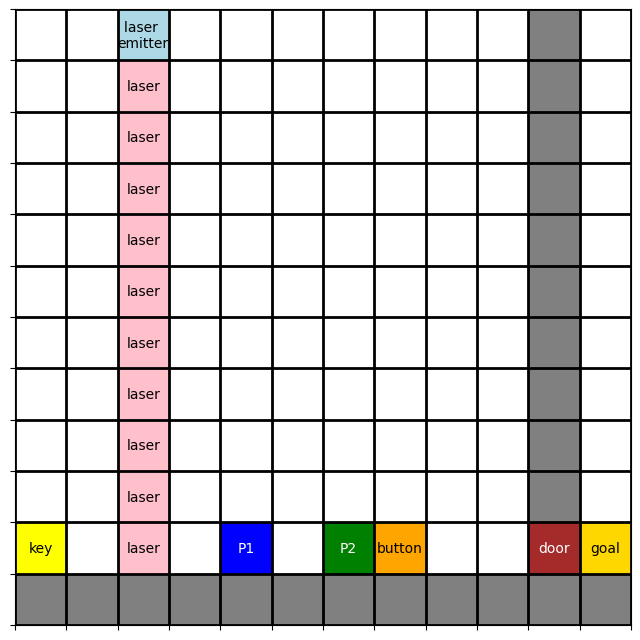

Round: 1, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to stand on the button ('n') in order to deactivate the laser on the direct path to the goal. This will clear the way for the other players to safely advance. Once the laser is deactivated, we can consider the next steps to reach the goal."
} 

After player A take the move, here is how the game looks like: 


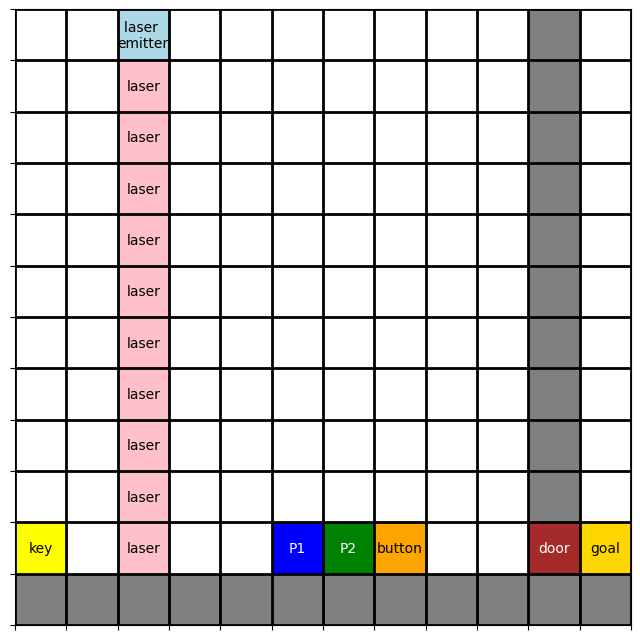

For player B, LLM outcome:

 {
  "move": "jump over right",
  "communication": "I support Player A's plan to move right and stand on the button ('n') to deactivate the laser. My move to jump over right is to navigate around the obstacles and safely advance towards the goal. Once the laser is deactivated, we can collectively plan our next moves to reach the goal."
} 

After player B take the move, here is how the game looks like: 


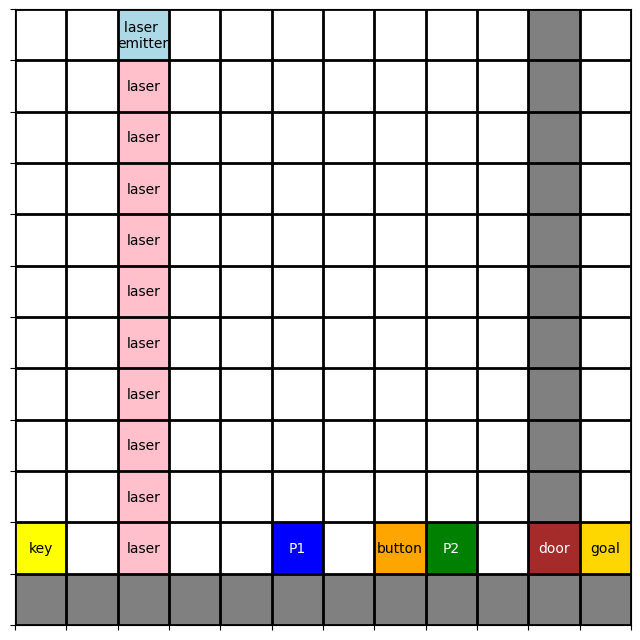

The moves collected till this round: [{'A': 'move right', 'B': 'jump over right'}]
Round: 2, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to reach the key('k') tile in the next turn. This will allow us to unlock the door('&') on the path to the goal and clear the way for all players to reach the goal tile. Let's continue with the plan to remove the obstacles and reach the goal together."
} 

After player A take the move, here is how the game looks like: 


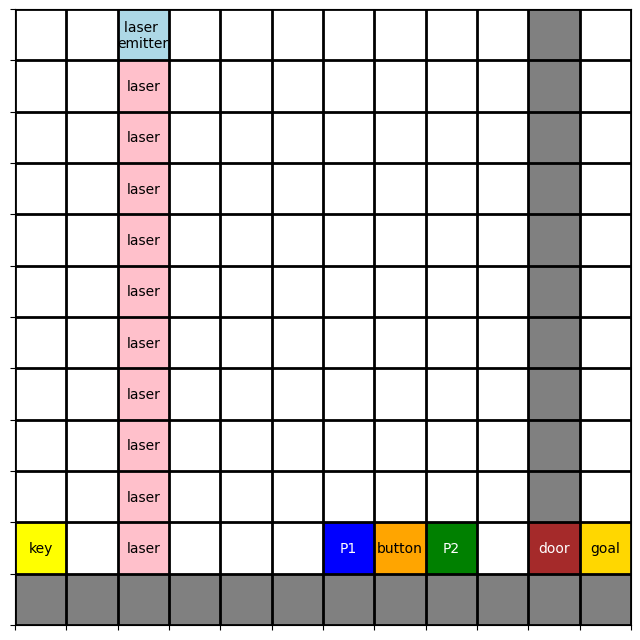

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to clear the path to the key('k') tile. This will allow us to unlock the door('&') and remove the obstacle on the path to the goal. This supports Player A's plan to reach the key and unlock the door. Let's continue working together to clear the way for all players to reach the goal tile."
} 

After player B take the move, here is how the game looks like: 


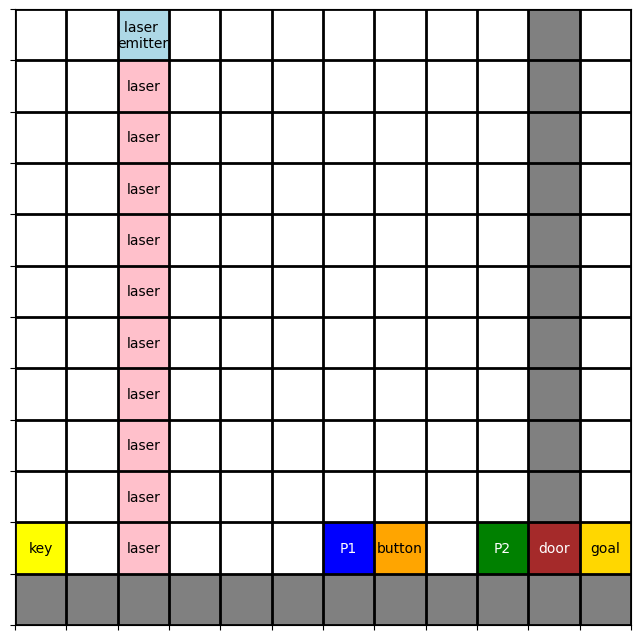

The moves collected till this round: [{'A': 'move right', 'B': 'jump over right'}, {'A': 'move right', 'B': 'move right'}]
Round: 3, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move to the right to get closer to the key('k') and unlock the door('&'). This will clear the path to the goal tile for all players."
} 

After player A take the move, here is how the game looks like: 


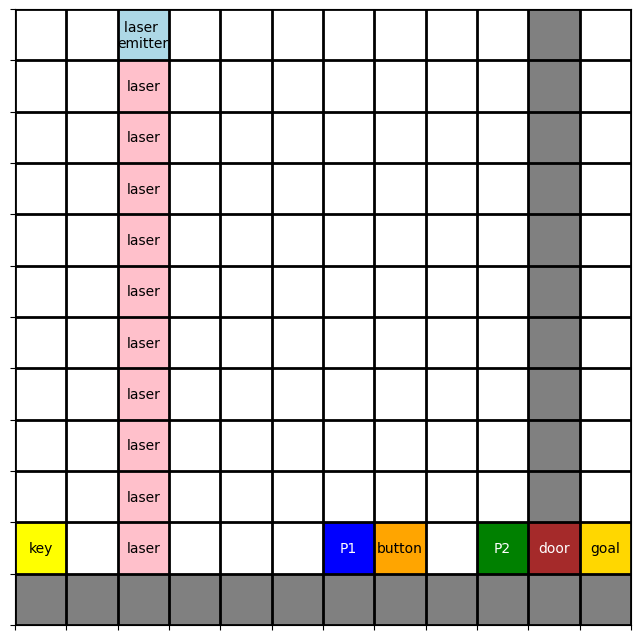

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "I support Player A's plan. By moving right, I can get closer to the goal and be in a position to reach the goal once the door is unlocked. Let's continue with the plan to clear the path by unlocking the door with the key."
} 

After player B take the move, here is how the game looks like: 


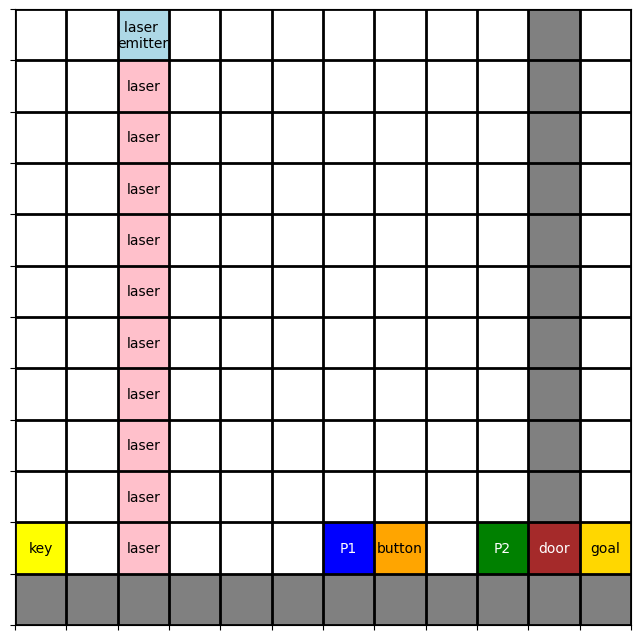

The moves collected till this round: [{'A': 'move right', 'B': 'jump over right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}]
Round: 4, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "jump on right",
  "communication": "I see that the laser obstacle can be deactivated by jumping on the button. By jumping on the right, I can approach the button to deactivate the laser and clear the way for the other players to move towards the goal. This move supports the plan to remove the obstacle blocking the path to the goal."
} 

After player A take the move, here is how the game looks like: 


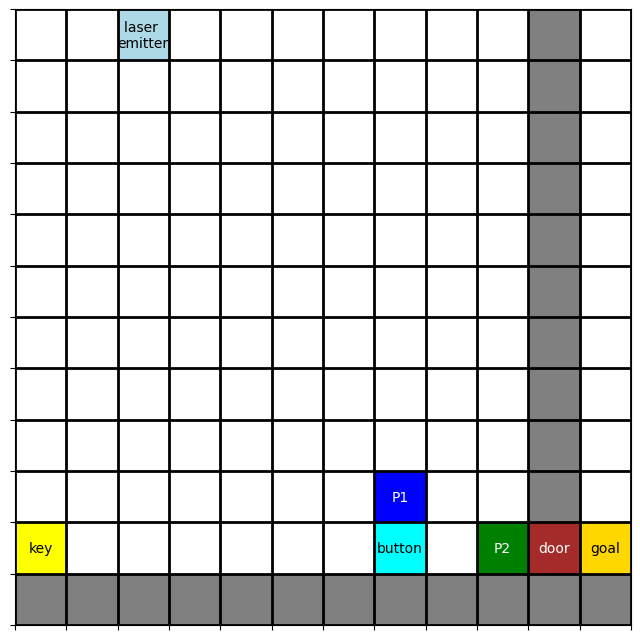

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to allow player A to jump on the button and deactivate the laser obstacle. This will clear the path for us to proceed towards the goal. Once the laser obstacle is cleared, we can focus on the next steps to reach the goal."
} 

After player B take the move, here is how the game looks like: 


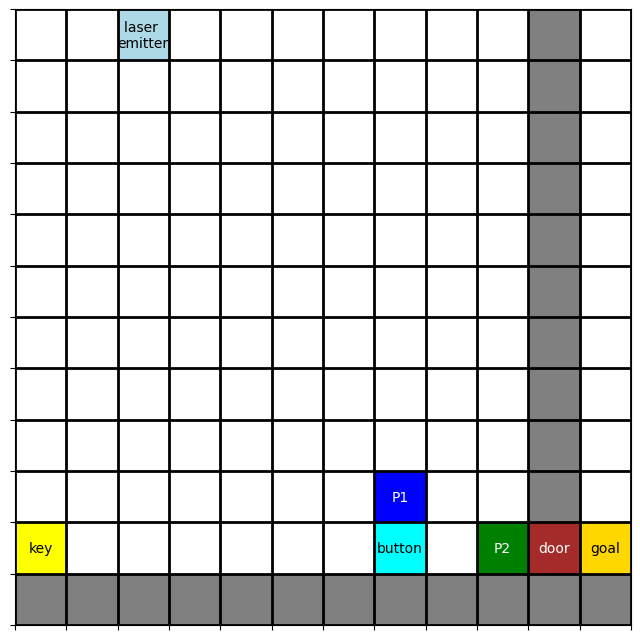

The moves collected till this round: [{'A': 'move right', 'B': 'jump over right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'jump on right', 'B': 'move right'}]
Round: 5, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to reach the key tile ('k'), so that I can unlock the door ('&') and clear the path for other players. This will help us progress towards the goal."
} 

After player A take the move, here is how the game looks like: 


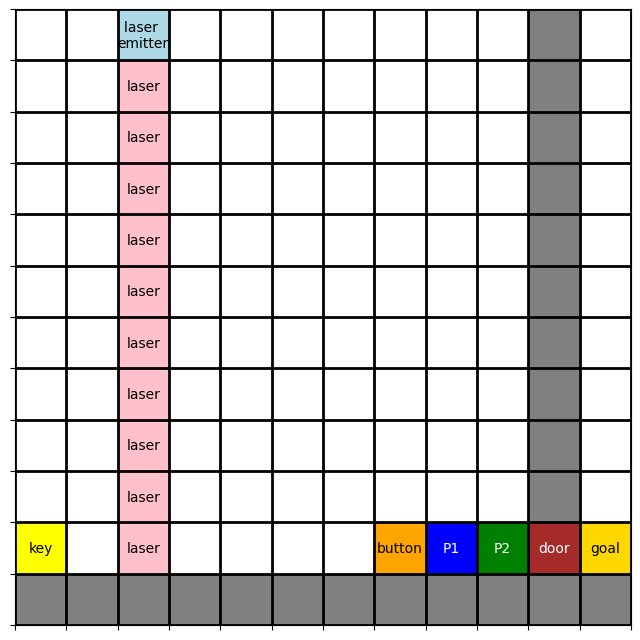

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "I support your plan. Moving right to make way for Player A to reach the key tile ('k') in the next turn. This will allow us to unlock the door ('&') and clear the path for all players to progress towards the goal."
} 

After player B take the move, here is how the game looks like: 


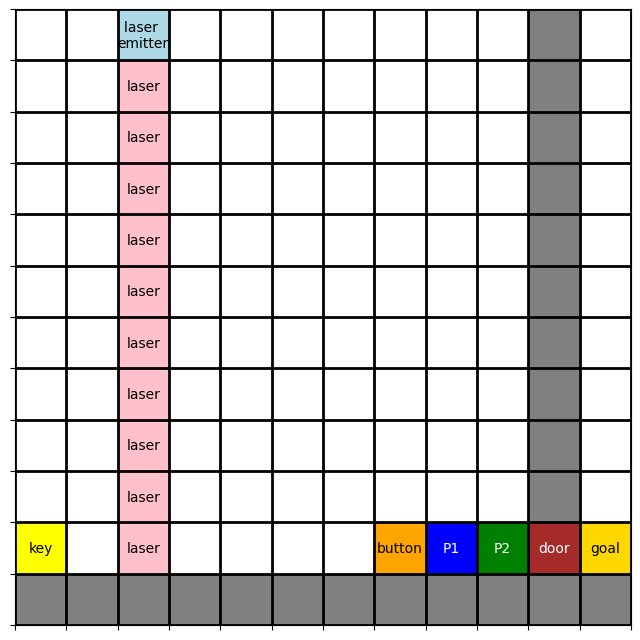

The moves collected till this round: [{'A': 'move right', 'B': 'jump over right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'jump on right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}]
Round: 6, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to get closer to the button. Once I'm there, I can deactivate the laser by standing on the button. This will clear the path for us to approach the key and unlock the door."
} 

After player A take the move, here is how the game looks like: 


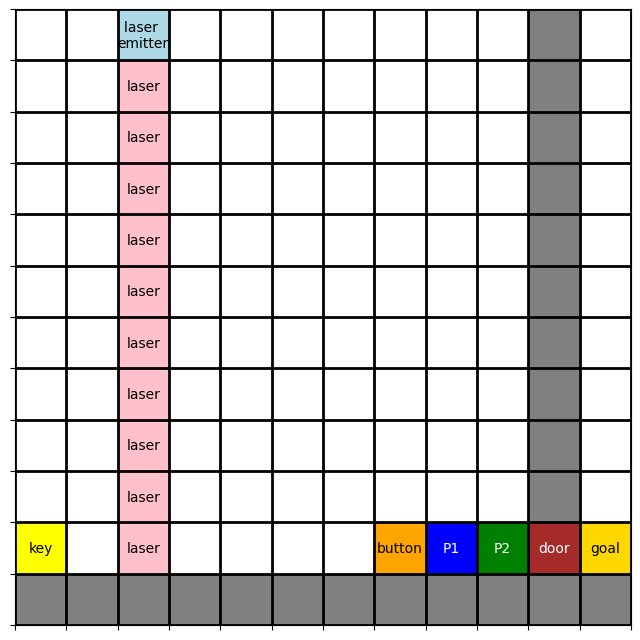

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "I confirm and support Player A's plan. By moving right, I will get closer to the key and the door. Once Player A deactivates the laser by standing on the button, I can move in to collect the key and unlock the door, clearing the path for all of us to reach the goal."
} 

After player B take the move, here is how the game looks like: 


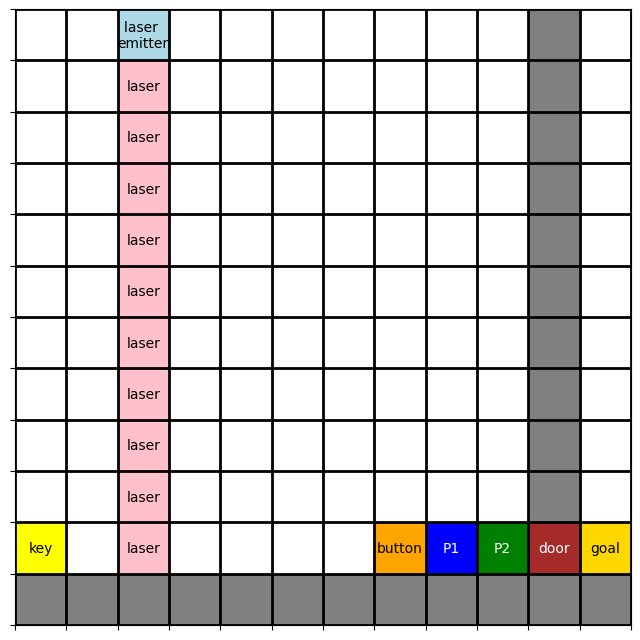

The moves collected till this round: [{'A': 'move right', 'B': 'jump over right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'jump on right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}]
Round: 7, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to reach the button ('n') and deactivate the laser, clearing the path for all players to reach the goal."
} 

After player A take the move, here is how the game looks like: 


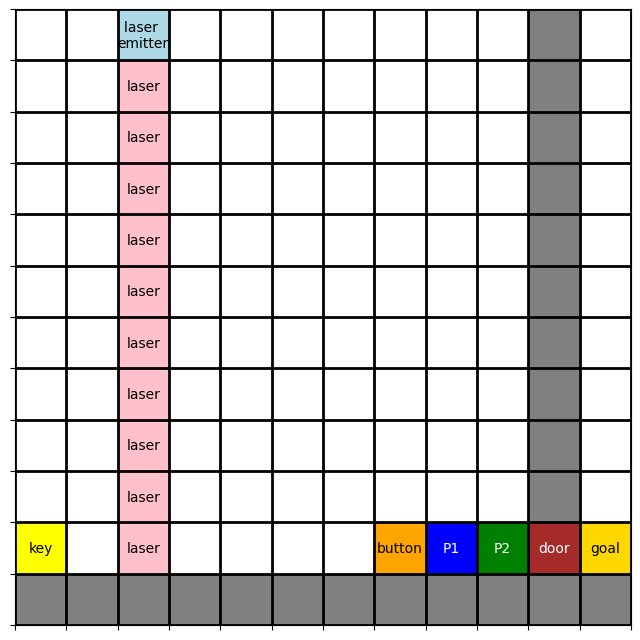

For player B, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to be in position to collect the key on the next turn. This will help us unlock the door and clear the path to the goal. Let's keep the coordination going to ensure our success."
} 

After player B take the move, here is how the game looks like: 


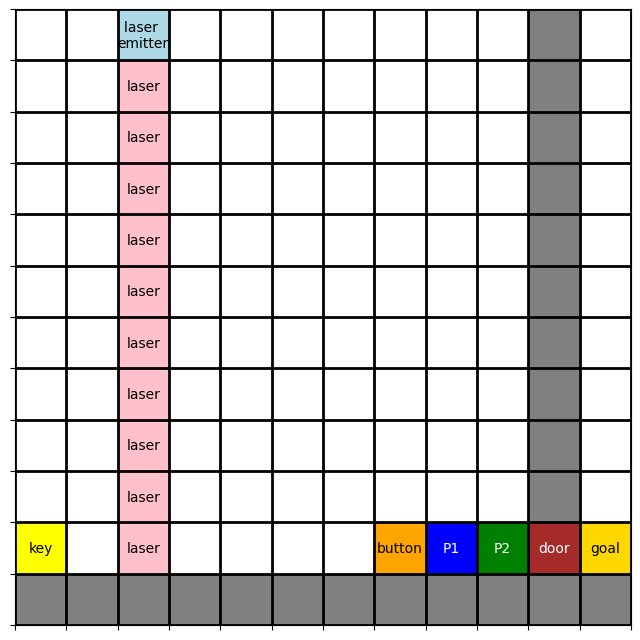

The moves collected till this round: [{'A': 'move right', 'B': 'jump over right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'jump on right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}, {'A': 'move right', 'B': 'move right'}]
Round: 8, Current player list: ['A', 'B']
For player A, LLM outcome:

 {
  "move": "move right",
  "communication": "I will move right to reach the button ('n') and deactivate the laser ('z'). This will clear the path for the other players to proceed towards the goal. Make sure to follow up with the next actions in our sequence to continue clearing the obstacles."
} 

After player A take the move, here is how the game looks like: 


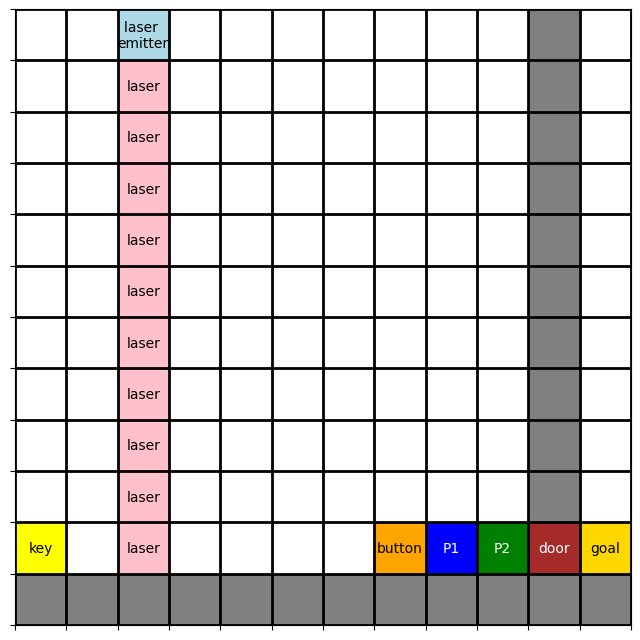

KeyboardInterrupt: 

In [7]:
MAX_ROUND = 20
PLAYER_LIST = ['A', 'B', 'C', 'D']  # Max number of players. 
current_round = 1

current_level = level_2.copy()
player_list = [x for x in PLAYER_LIST if x in current_level] # Players in the initial game setup. 
if not player_list:
    print('At least one player(ABCD) should set up in the initial game.')

openai_api_key=os.environ['OPENAI_API_KEY']
prompt = ['demo_system_1.txt', 'demo_user_1.txt']

print('==================================================================')
print('Before we start, this is how the game looks like. ')
display_level_with_labels(current_level)
moves = []
game_status = 1 # 1: in progress, 0: finished successfully

# If game still in progress, run one round
while (game_status) and (current_round < MAX_ROUND):
    # Initialization
    agent_thoughts = '' 
    actions = {} # collect all action(s) in this round
    player_list = [x for x in player_list if x in current_level]
    print('==================================================================')
    print('Round: {}, Current player list: {}'.format(current_round, player_list))

    for player in player_list:
        outcome = agent_loop(prompt, openai_api_key, current_level, agent_thoughts, player)
        print('For player {}, LLM outcome:'.format(player))
        print('\n {} \n'.format(outcome))
        outcome_dict = eval(outcome)
        actions[player] = outcome_dict['move'] # Store all the moves from this round. 
        agent_thoughts += 'Player ' + player + ' said in this turn: ' + outcome_dict['communication']
        # update level
        move = {} # Store the move for current player in current turn. => Need adjust LLM output to simplify this
        move[player] = outcome_dict['move']
        current_level = apply_game_updates(current_level, move)
        print('After player {} take the move, here is how the game looks like: '.format(player))
        display_level_with_labels(current_level)  
    moves.append(actions)
    print('The moves collected till this round: {}'.format(moves))
    current_round += 1